##Kyle Braman, Donovan Dutcher, Nathaniel Plummer, William Bange

In [3]:
from wordcloud import STOPWORDS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The tidytext package isn't in Google Colaboratory's default list of packages, so we install it first
!pip install tidytext
import tidytext
# This library is used by tidytext for tokenization
import nltk
nltk.download('punkt')

import plotly.express as px

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3871 sha256=0249ea887839f56a8b251d92a0ec29aac18ee34b8aa9d1c8c5afa316a568e788
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')

GTC_V2.head(3)

,tribunal,id_transcript,case,accused,date,text,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document,url
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Good morning, everybody. Mr. Re...",0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
1,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. HOMETOWU: Thank you, Mr. President. Trial ...",0,Court Proceedings,[UB],1,120,63d0010e97ad59b4cfc62704,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
2,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Appearances, please.",0,JudgeProc,[UB],1,525,63d000fd97ad59b4cfc626ff,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...


In [5]:
#Select specific columns
GTC_V2 = GTC_V2[['tribunal','accused', 'text', 'trauma', 'role', 'n_witnesses']]

In [6]:
#Generate value counts for accused column
GTC_V2['accused'].value_counts()

accused
Kaing Guev Eav               8189
Nuon Chea & Khieu Samphan    7687
Milan & Sredoje Lukic        5115
Edouard Karemera et al.      5041
Ratko Mladic                 4222
Vujadin Popovic et al.       4011
Athanase Seromba             3674
Sylvestre Gacumbitsi         3402
Zdravko Tolimir              3229
Callixte Nzabonimana         3089
Milomir Stakic               2640
Tharcisse Renzaho            2546
Name: count, dtype: int64

In [7]:
#Generate value counts for tribunal column
GTC_V2['tribunal'].value_counts()

tribunal
ICTY    19217
ICTR    17752
ECCC    15876
Name: count, dtype: int64

In [8]:
#Generate value counts for trauma column
GTC_V2['trauma'].value_counts()

trauma
0    50293
1     2552
Name: count, dtype: int64

In [9]:
#Separate into the ECCC tribunal
ECCC = GTC_V2.loc[GTC_V2['tribunal']=='ECCC']
ECCC.head(3)

,tribunal,accused,text,trauma,role,n_witnesses
16862,ECCC,Kaing Guev Eav,P R O C E E D I N G S (Judges enter the courtr...,0,Court Proceedings,2
16863,ECCC,Kaing Guev Eav,MR. PRESIDENT: This morning the Trial Chamber ...,0,JudgeProc,2
16864,ECCC,Kaing Guev Eav,"THE GREFFIER: Your Honours, Mr. President, the...",0,Court Proceedings,2


In [10]:
#Generate value counts for ECCC roles
ECCC['role'].value_counts()

role
Witness              6120
LawyerQA             3662
JudgeQA              2264
JudgeProc            1631
LawyerProc           1325
Court Proceedings     672
Accused               202
Name: count, dtype: int64

In [11]:
#Generate value counts for ECCC accused
ECCC['accused'].value_counts()

accused
Kaing Guev Eav               8189
Nuon Chea & Khieu Samphan    7687
Name: count, dtype: int64

##Very few words spoken by the accused##

In [12]:
Kaing = ECCC.loc[ECCC['accused']=='Kaing Guev Eav'] #Getting just Kaing Transcript
Kaing.head(10)

,tribunal,accused,text,trauma,role,n_witnesses
16862,ECCC,Kaing Guev Eav,P R O C E E D I N G S (Judges enter the courtr...,0,Court Proceedings,2
16863,ECCC,Kaing Guev Eav,MR. PRESIDENT: This morning the Trial Chamber ...,0,JudgeProc,2
16864,ECCC,Kaing Guev Eav,"THE GREFFIER: Your Honours, Mr. President, the...",0,Court Proceedings,2
16865,ECCC,Kaing Guev Eav,MR. PRESIDENT: Greffier put those records of t...,0,JudgeProc,2
16866,ECCC,Kaing Guev Eav,(Witness enters courtroom),0,Court Proceedings,2
16867,ECCC,Kaing Guev Eav,MR. PRESIDENT: Is your name Chan Voeun?,0,JudgeQA,2
16868,ECCC,Kaing Guev Eav,"MR. CHAN VOEUN: Yes, my name is Chan Voeun.",0,Witness,2
16869,ECCC,Kaing Guev Eav,MR. PRESIDENT: How old are you this year?,0,JudgeQA,2
16870,ECCC,Kaing Guev Eav,MR. CHAN VOEUN: I am 56 years old.,0,Witness,2
16871,ECCC,Kaing Guev Eav,MR. PRESIDENT: Where is your current address?,0,JudgeQA,2


In [13]:
#Getting the Paired Transcript (Nuon Chea and Khieu Samphan)
otherAccused = ECCC.loc[ECCC['accused'].str.contains('Nuon')]
otherAccused.head(10)

,tribunal,accused,text,trauma,role,n_witnesses
18224,ECCC,Nuon Chea & Khieu Samphan,PROCEEDINGS (Court opens at 1334H),0,Court Proceedings,1
18225,ECCC,Nuon Chea & Khieu Samphan,MR. PRESIDENT: Please be seated. The Court is ...,0,JudgeProc,1
18226,ECCC,Nuon Chea & Khieu Samphan,"THE GREFFIER: Mr. President, for today's proce...",0,Court Proceedings,1
18227,ECCC,Nuon Chea & Khieu Samphan,"MR. PRESIDENT: Thank you, Ms. Sivhoang. And be...",0,JudgeProc,1
18228,ECCC,Nuon Chea & Khieu Samphan,Having seen the medical report by the duty doc...,0,JudgeProc,1
18229,ECCC,Nuon Chea & Khieu Samphan,(Witness enters courtroom),0,Court Proceedings,1
18230,ECCC,Nuon Chea & Khieu Samphan,QUESTIONING BY THE PRESIDENT: Good afternoon M...,0,JudgeQA,1
18231,ECCC,Nuon Chea & Khieu Samphan,MR. VAN SOEUN: A. My name is Van Soeun.,0,Witness,1
18232,ECCC,Nuon Chea & Khieu Samphan,Q. Is your name Van Soeun? Isn't it? What abou...,0,JudgeQA,1
18233,ECCC,Nuon Chea & Khieu Samphan,A. Soan is also my name.,0,Witness,1


In [14]:
#Search for words spoken by Kaing as role Accused
KaingWords = Kaing.loc[Kaing['role']=='Accused']
KaingWords.head(10)

,tribunal,accused,text,trauma,role,n_witnesses
17053,ECCC,Kaing Guev Eav,"THE ACCUSED: Your Honours, first of all, let m...",0,Accused,2
17055,ECCC,Kaing Guev Eav,THE ACCUSED: I can state that Chan Voeun was n...,0,Accused,2
17056,ECCC,Kaing Guev Eav,"When Mr. Pon, Comrade Pon ask Comrade Meas how...",0,Accused,2
17057,ECCC,Kaing Guev Eav,In 1973 they did not yet assign the cooperativ...,0,Accused,2
17059,ECCC,Kaing Guev Eav,"THE ACCUSED: Your Honours, this person is not ...",0,Accused,2
17155,ECCC,Kaing Guev Eav,THE ACCUSED: I would like to confirm a little ...,0,Accused,2
17157,ECCC,Kaing Guev Eav,THE ACCUSED: The main problem I would like to ...,0,Accused,2
17158,ECCC,Kaing Guev Eav,I would like to confirm to Your Honours that t...,0,Accused,2
17159,ECCC,Kaing Guev Eav,As for -- I tried to raise three children from...,0,Accused,2
17160,ECCC,Kaing Guev Eav,As for I ask for... to ask for the guard from ...,0,Accused,2


In [20]:
Kaing.loc[Kaing['text'].str.contains('Chan')]

,tribunal,accused,text,trauma,role,n_witnesses
16867,ECCC,Kaing Guev Eav,MR. PRESIDENT: Is your name Chan Voeun?,0,JudgeQA,2
16868,ECCC,Kaing Guev Eav,"MR. CHAN VOEUN: Yes, my name is Chan Voeun.",0,Witness,2
16965,ECCC,Kaing Guev Eav,A. Amongst them there were two of them includ...,0,Witness,2
16967,ECCC,Kaing Guev Eav,"A. Yes, that is correct, only Duch and Chan.",0,Witness,2
17053,ECCC,Kaing Guev Eav,"THE ACCUSED: Your Honours, first of all, let m...",0,Accused,2
...,...,...,...,...,...,...
32702,ECCC,Kaing Guev Eav,"MR. WERNER: Your Honour, just to say two words...",0,LawyerProc,1
32706,ECCC,Kaing Guev Eav,"JUDGE CARTWRIGHT: Yes, thank you, Mr. Presiden...",0,JudgeProc,1
32720,ECCC,Kaing Guev Eav,"MS. CANIZARES: Thank you, Your Honour. I do i...",0,LawyerProc,1
32735,ECCC,Kaing Guev Eav,"THE ACCUSED: Mr. President, in the matter of c...",0,Accused,1


In [23]:
#In paired transcript, neither accused spoke
otherAccused.loc[otherAccused['role']=='Accused'].head(10)

,tribunal,accused,text,trauma,role,n_witnesses


##Seeing if there is anything interesting in Kaing's statements. We know that he was the only person who admitted that his crimes were wrong. Internet says that he described S-21 prison camp, so we'll see --Kyle##

In [25]:
#Unnest Kaing's words
KaingWords = tidytext.unnest_tokens(KaingWords, 'words', 'text')

In [26]:
#Select only the trauma and words columns
KaingWords = KaingWords[['trauma', 'words']]
KaingWords.head(3)

,trauma,words
17053,0,the
17053,0,accused
17053,0,your


##18,000 words total in Kaing's testimony (prior to filtering out stopwords) --Kyle

In [27]:
KaingWords['words'].value_counts()

words
the           1313
i              734
to             645
and            630
that           478
              ... 
convinced        1
ponhea           1
mentioning       1
located          1
official         1
Name: count, Length: 2262, dtype: int64

In [28]:
kaingStopWords = list(STOPWORDS)
kaingStopWords.append('mr')
kaingStopWords.append('president') #Used everytime someone addressed the tribunal leader(similar to saying "sir")
kaingStopWords.append('said')
kaingStopWords.append('person')
kaingStopWords.append('time')
kaingStopWords.append('people')
kaingStopWords.append('youre')
kaingStopWords.append('thats')
kaingStopWords.append('one')
kaingStopWords.append('two')
kaingStopWords.append('still')

In [31]:
KaingClean = KaingWords.loc[~KaingWords['words'].isin(kaingStopWords)] #Clean up kaing's dialogues
KaingClean.head(10)

,trauma,words
17053,0,accused
17053,0,honours
17053,0,first
17053,0,let
17053,0,inform
17053,0,chan
17053,0,voeun
17053,0,staff
17053,0,office
17053,0,m13


##~7700 after filtering out stopwords. This is variable depending on what else we want to pull out--Kyle

In [ ]:
#S-21 is the most used word when STOPWORDS are Filtered Out
KaingClean.value_counts()

trauma  words         
0       s21               148
        accused           118
        testimony          62
        staff              47
        document           44
                         ... 
        interviewed         1
        interview           1
        interpretation      1
        intent              1
        located             1
Name: count, Length: 2133, dtype: int64

In [ ]:
(148/7722)*100

1.9166019166019166

In [33]:
KaingCount = KaingClean.groupby('trauma')['words'].value_counts(normalize = True)

In [34]:
KaingCount.head(10)

trauma  words    
0       s21          0.019166
        accused      0.015281
        testimony    0.008029
        staff        0.006087
        document     0.005698
        comrade      0.005569
        regarding    0.005439
        arrested     0.004533
        sent         0.004533
        first        0.004403
Name: proportion, dtype: float64

In [ ]:
KaingCount = KaingCount[KaingCount>0.003491]
KaingCount.head(30)

trauma  words    
0       s21          0.019166
        accused      0.015281
        testimony    0.008029
        staff        0.006087
        document     0.005698
        comrade      0.005569
        regarding    0.005439
        arrested     0.004533
        sent         0.004533
        first        0.004403
        brother      0.004403
        know         0.004274
        make         0.004274
        already      0.004144
        later        0.004144
        chan         0.004015
        chamber      0.004015
        number       0.004015
        khan         0.003885
        prak         0.003756
        went         0.003756
        documents    0.003497
        office       0.003497
        think        0.003497
        believe      0.003497
Name: proportion, dtype: float64

In [ ]:
KaingCount.name = 'Text_Freq'
KaingCount = KaingCount.reset_index()
KaingCount.head(5)

,trauma,words,Text_Freq
0,0,s21,0.019166
1,0,accused,0.015281
2,0,testimony,0.008029
3,0,staff,0.006087
4,0,document,0.005698


In [ ]:
KaingCount = KaingCount.sort_values('Text_Freq', ascending = False)
KaingCount

,trauma,words,Text_Freq
0,0,s21,0.019166
1,0,accused,0.015281
2,0,testimony,0.008029
3,0,staff,0.006087
4,0,document,0.005698
5,0,comrade,0.005569
6,0,regarding,0.005439
7,0,arrested,0.004533
8,0,sent,0.004533
9,0,first,0.004403


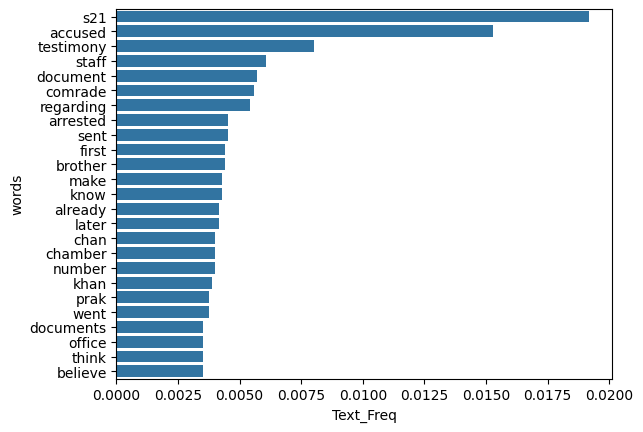

In [ ]:
firstlast = pd.concat([KaingCount[0:20], KaingCount[-10:]])

sns.barplot(KaingCount, x = 'Text_Freq', y = 'words')
plt.show()

##Prak is in this list. Digging a bit, that is the name of the president of the pre-trial proceedings. Prak Kimsan.

# Looking at ICTY- Nate

In [ ]:
ICTY = GTC_V2.loc[GTC_V2['tribunal']=='ICTY']

In [ ]:
ICTY['accused'].value_counts()

Milan & Sredoje Lukic     5115
Ratko Mladic              4222
Vujadin Popovic et al.    4011
Zdravko Tolimir           3229
Milomir Stakic            2640
Name: accused, dtype: int64

In [ ]:
ICTY['role'].value_counts()

Witness              6637
LawyerQA             5733
JudgeProc            2631
LawyerProc           2169
Court Proceedings     863
Accused               850
JudgeQA               334
Name: role, dtype: int64

In [ ]:
Lukic=ICTY.loc[ICTY['accused']=='Milan & Sredoje Lukic']
Mladic=ICTY.loc[ICTY['accused']=='Ratko Mladic']
Popovic=ICTY.loc[ICTY['accused']=='Vujadin Popovic et al.']
Tolimir=ICTY.loc[ICTY['accused']=='Zdravko Tolimir']
Stakic=ICTY.loc[ICTY['accused']=='Milomir Stakic']

In [ ]:
TolimirWords=Tolimir.loc[Tolimir['role']=='Accused'] #He was the only accused in the whole ICTY to talk. He was a high up in the Serb Army.
#Reported directly to General Mladic.
TolimirWords

,tribunal,accused,text,trauma,role,n_witnesses
1346,ICTY,Zdravko Tolimir,"THE ACCUSED: [Interpretation] Thank you, Mr. P...",0,Accused,1
1347,ICTY,Zdravko Tolimir,And it was only at 7.30 last night -- p.m. las...,0,Accused,1
1348,ICTY,Zdravko Tolimir,And in the opening statement made by the Prose...,0,Accused,1
1364,ICTY,Zdravko Tolimir,THE ACCUSED: [Interpretation] Thank you. I ha...,0,Accused,1
1372,ICTY,Zdravko Tolimir,"THE ACCUSED: [Interpretation] Thank you, Mr. P...",0,Accused,1
...,...,...,...,...,...,...
15366,ICTY,Zdravko Tolimir,"Q. So as a member of the BH Army, you were -...",0,Accused,2
15368,ICTY,Zdravko Tolimir,Q. Thank you. THE ACCUSED: [Interpretation] ...,0,Accused,2
15374,ICTY,Zdravko Tolimir,"THE ACCUSED: [Interpretation] Thank you, Mr. P...",0,Accused,2
15376,ICTY,Zdravko Tolimir,"THE ACCUSED: [Interpretation] Well, but perhap...",0,Accused,2


In [ ]:
TolimirWords = tidytext.unnest_tokens(Tolimir, 'words', 'text')
TolimirWords=TolimirWords[['trauma', 'words']]

In [ ]:
TolimirWords['words'].value_counts()
TolimirClean = TolimirWords.loc[~TolimirWords['words'].isin(STOPWORDS)]
TolimirClean['words'].value_counts()

thank          1112
q              1083
mr             1018
witness         731
judge           507
               ... 
collects          1
focused           1
geopolitics       1
tribunals         1
215               1
Name: words, Length: 4731, dtype: int64

In [ ]:
my_stop = list(STOPWORDS)
my_stop.append('thank')
my_stop.append('q')
my_stop.append('mr')
my_stop.append('witness')
my_stop.append('judge')
my_stop.append('fluegge')
my_stop.append('president')
my_stop.append('us')
my_stop.append('well')
my_stop.append('dont')
my_stop.append('stop')

In [ ]:
TolimirClean2=TolimirWords.loc[~TolimirWords['words'].isin(my_stop)]
TolimirClean2['words'].value_counts()

people            464
know              445
interpretation    429
please            369
see               369
                 ... 
collects            1
focused             1
geopolitics         1
tribunals           1
215                 1
Name: words, Length: 4720, dtype: int64

In [ ]:
TolimirCount=TolimirClean2.groupby('trauma')['words'].value_counts(normalize=True)
TolimirCount

trauma  words         
0       interpretation    0.010680
        know              0.009950
        please            0.009270
        see               0.008615
        now               0.008464
                            ...   
1       yell              0.000221
        yet               0.000221
        youll             0.000221
        yugoslav          0.000221
        zone              0.000221
Name: words, Length: 5802, dtype: float64

In [ ]:
TolimirCount=TolimirCount[TolimirCount>.0045]

In [ ]:
TolimirCount.name='text_freq'
TolimirCount=TolimirCount.reset_index()
TolimirCount

,trauma,words,text_freq
0,0,interpretation,0.010680
1,0,know,0.009950
2,0,please,0.009270
3,0,see,0.008615
4,0,now,0.008464
5,0,people,0.008464
6,0,yes,0.008237
7,0,will,0.007935
8,0,tolimir,0.007431
9,0,tell,0.007103


In [ ]:
TolimirCount1=TolimirCount.loc[TolimirCount['trauma']==1]
TolimirCount0=TolimirCount.loc[TolimirCount['trauma']==0]

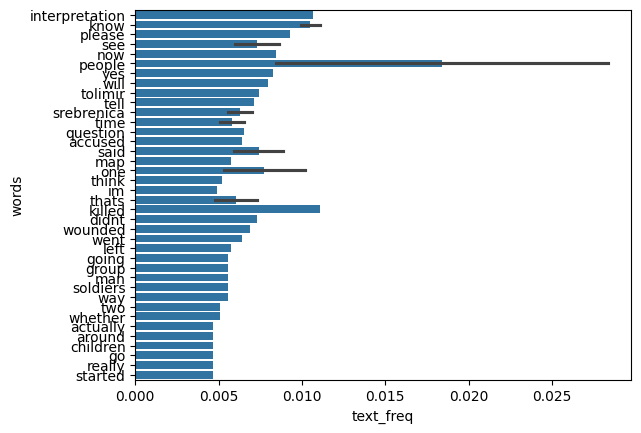

In [ ]:
sns.barplot(TolimirCount, x = 'text_freq', y = 'words')
plt.show()

# ICTR- Nate

In [ ]:
ICTR=GTC_V2.loc[GTC_V2['tribunal']=='ICTR'] #Split into the ICTR tribunal

In [ ]:
ICTR['accused'].value_counts()

Edouard Karemera et al.    5041
Athanase Seromba           3674
Sylvestre Gacumbitsi       3402
Callixte Nzabonimana       3089
Tharcisse Renzaho          2546
Name: accused, dtype: int64

In [ ]:
ICTR['role'].value_counts()

Witness              6097
LawyerQA             5886
LawyerProc           2707
JudgeProc            1912
Court Proceedings     700
JudgeQA               450
Name: role, dtype: int64

In [ ]:
Karemera=ICTR.loc[ICTR['Accused']=='Edouard Karemera et al.']
Seromba=ICTR.loc[ICTR['Accused']=='Athanase Seromba']
Gacumbitsi=ICTR.loc[ICTR['Accused']=='Sylvestre Gacumbitsi']
Nazabonimana=ICTR.loc[ICTR['Accused']=='Callixte Nzabonimana']
Renzaho=ICTR.loc[ICTR['Accused']=='Tharcisse Renzaho']
#doing a .head() of all of these datasets show that none of the accused actually spoke
#at the ICTR. If they did speak we would have included word counts of their statements.

In [ ]:
GTC_V2.head()

,tribunal,accused,text,trauma,role,n_witnesses
0,ICTR,Callixte Nzabonimana,"MR. PRESIDENT: Good morning, everybody. Mr. Re...",0,JudgeProc,1
1,ICTR,Callixte Nzabonimana,"MR. HOMETOWU: Thank you, Mr. President. Trial ...",0,Court Proceedings,1
2,ICTR,Callixte Nzabonimana,"MR. PRESIDENT: Appearances, please.",0,JudgeProc,1
3,ICTR,Callixte Nzabonimana,"MR. WEBSTER: Good morning, Your Honours, and g...",0,LawyerProc,1
4,ICTR,Callixte Nzabonimana,MR. PRESIDENT: Has Mr. Morley been removed fro...,0,JudgeProc,1


In [ ]:
df = tidytext.unnest_tokens(GTC_V2, 'word', 'text')
df.head()

,tribunal,accused,trauma,role,n_witnesses,word
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,mr
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,president
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,good
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,morning
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,everybody


In [ ]:
df.groupby('trauma')['role'].value_counts()
#This line shows that trauma value 1 only occurs in rows with the witness label

trauma  role             
0       Witness              474037
        LawyerQA             437660
        LawyerProc           290500
        JudgeProc            191698
        JudgeQA               82361
        Accused               51932
        Court Proceedings     51457
1       Witness              192011
Name: role, dtype: int64

##Looks like only the witnesses had trauma in their language? Interesting. I would have thought that somebody else would have had something. Especially the lawyers.##

In [ ]:
df = df[['word', 'trauma']]
df.head()

,word,trauma
0,mr,0
0,president,0
0,good,0
0,morning,0
0,everybody,0


In [ ]:
df['trauma'].value_counts()

0    1579645
1     192011
Name: trauma, dtype: int64

In [ ]:
counts = df.groupby('trauma')['word'].value_counts()
counts.name = 'n'
counts = counts.reset_index()

In [ ]:
counts

,trauma,word,n
0,0,the,97636
1,0,to,47310
2,0,you,46427
3,0,that,39646
4,0,i,37054
...,...,...,...
29872,1,zupa,1
29873,1,zyerarusha,1
29874,1,économat,1
29875,1,–,1


In [ ]:
tfidf = tidytext.bind_tf_idf(counts, 'word', 'trauma', 'n')
tfidf.head()

,trauma,word,n,tf,idf,tf_idf
0,0,the,97636,0.061809,0.0,0.0
1,0,to,47310,0.029950,0.0,0.0
2,0,you,46427,0.029391,0.0,0.0
3,0,that,39646,0.025098,0.0,0.0
4,0,i,37054,0.023457,0.0,0.0


In [ ]:
tfidf.loc[tfidf['tf_idf']!=0]

,trauma,word,n,tf,idf,tf_idf
170,0,page,1160,0.000734,0.693147,0.000509
192,0,prosecution,1006,0.000637,0.693147,0.000441
217,0,orie,859,0.000544,0.693147,0.000377
229,0,robinson,787,0.000498,0.693147,0.000345
244,0,hooper,718,0.000455,0.693147,0.000315
...,...,...,...,...,...,...
29861,1,zegenya,1,0.000005,0.693147,0.000004
29863,1,zekovici,1,0.000005,0.693147,0.000004
29868,1,ziko,1,0.000005,0.693147,0.000004
29873,1,zyerarusha,1,0.000005,0.693147,0.000004


In [ ]:
tfidf = tfidf.sort_values("tf_idf", ascending=False)

In [ ]:
tfidf.head()

,trauma,word,n,tf,idf,tf_idf
170,0,page,1160,0.000734,0.693147,0.000509
192,0,prosecution,1006,0.000637,0.693147,0.000441
217,0,orie,859,0.000544,0.693147,0.000377
229,0,robinson,787,0.000498,0.693147,0.000345
244,0,hooper,718,0.000455,0.693147,0.000315


In [ ]:
tfidf.loc[tfidf['trauma']==0].head(10) #Looking at the top non trauma words

,trauma,word,n,tf,idf,tf_idf
170,0,page,1160,0.000734,0.693147,0.000509
192,0,prosecution,1006,0.000637,0.693147,0.000441
217,0,orie,859,0.000544,0.693147,0.000377
229,0,robinson,787,0.000498,0.693147,0.000345
244,0,hooper,718,0.000455,0.693147,0.000315
252,0,exhibit,709,0.000449,0.693147,0.000311
255,0,agius,704,0.000446,0.693147,0.000309
329,0,transcript,527,0.000334,0.693147,0.000231
389,0,registrar,446,0.000282,0.693147,0.000196
387,0,ern,446,0.000282,0.693147,0.000196


##Alphons Orie is a judge in the Tribunal.

##Arthur Robinson was a PM and then President of Trinidad and Tobago. Then he helped found the ICC

https://www.icc-cpi.int/news/statement-international-criminal-court-passing-arthur-robinson

##Hooper is the name of the Lawyer that represented Rwamakuba. Rwamakuba supervised and personally took part in Tutsi Massacres

https://unictr.irmct.org/en/news/defence-closes-its-case-rwamakuba-trial

##Agius was president of Bosnia and Herzegovina.

https://www.icty.org/en/press/president-agius-pays-tribute-to-victims-of-srebrenica-genocide

##ern might be an artifact left over from something

##--KYLE

In [ ]:
tfidf.loc[tfidf['trauma']==1].head(10) #Looking at the top trauma words

,trauma,word,n,tf,idf,tf_idf
23189,1,thmat,10,0.000052,0.693147,0.000036
23206,1,bombardment,9,0.000047,0.693147,0.000032
23292,1,railings,9,0.000047,0.693147,0.000032
23450,1,scar,8,0.000042,0.693147,0.000029
23354,1,bunch,8,0.000042,0.693147,0.000029
23653,1,swim,7,0.000036,0.693147,0.000025
23538,1,cornfield,7,0.000036,0.693147,0.000025
24053,1,groaning,5,0.000026,0.693147,0.000018
24245,1,tracheak,5,0.000026,0.693147,0.000018
24095,1,lambretta,5,0.000026,0.693147,0.000018


##Tracheak might be trachea with a repeated error. Maybe some of these are from transcription errors? --Kyle

In [ ]:
tfidf.loc[tfidf.groupby('trauma')['tf_idf'].idxmax()]

,trauma,word,n,tf,idf,tf_idf
170,0,page,1160,0.000734,0.693147,0.000509
23189,1,thmat,10,0.000052,0.693147,0.000036


##I have no idea what thmat is. Searching it in relation to genocide brings up no results. I assume page is referencing specific pages of the tribunal documents.

# TF-IDF groupying of accused by tribunal.


In [ ]:
df = tidytext.unnest_tokens(GTC_V2, 'word', 'text')
df.head()

,tribunal,accused,trauma,role,n_witnesses,word
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,mr
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,president
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,good
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,morning
0,ICTR,Callixte Nzabonimana,0,JudgeProc,1,everybody


In [ ]:
df = df.loc[df['role']=='Accused']
df = df[['tribunal', 'word']]
df.head()

,tribunal,word
1346,ICTY,the
1346,ICTY,accused
1346,ICTY,interpretation
1346,ICTY,thank
1346,ICTY,you


In [ ]:
counts = df.groupby("tribunal")["word"].value_counts()
counts

tribunal  word    
ECCC      the         1313
          i            734
          to           645
          and          630
          that         478
                      ... 
ICTY      cover          1
          crimes         1
          criminal       1
          critical       1
          crossed        1
Name: count, Length: 4713, dtype: int64

In [ ]:
counts.name = "n"
counts = counts.reset_index()
counts

,tribunal,word,n
0,ECCC,the,1313
1,ECCC,i,734
2,ECCC,to,645
3,ECCC,and,630
4,ECCC,that,478
...,...,...,...
4708,ICTY,cover,1
4709,ICTY,crimes,1
4710,ICTY,criminal,1
4711,ICTY,critical,1


In [ ]:
tfidf = tidytext.bind_tf_idf(counts, "word", "tribunal", "n")
tfidf

,tribunal,word,n,tf,idf,tf_idf
0,ECCC,the,1313,0.070455,0.000000,0.000000
1,ECCC,i,734,0.039386,0.000000,0.000000
2,ECCC,to,645,0.034610,0.000000,0.000000
3,ECCC,and,630,0.033806,0.000000,0.000000
4,ECCC,that,478,0.025649,0.000000,0.000000
...,...,...,...,...,...,...
4708,ICTY,cover,1,0.000030,0.693147,0.000021
4709,ICTY,crimes,1,0.000030,0.000000,0.000000
4710,ICTY,criminal,1,0.000030,0.000000,0.000000
4711,ICTY,critical,1,0.000030,0.693147,0.000021


In [ ]:
tfidf = tfidf.loc[tfidf["tf_idf"] != 0]
tfidf

,tribunal,word,n,tf,idf,tf_idf
16,ECCC,s21,148,0.007942,0.693147,0.005505
63,ECCC,comrade,43,0.002307,0.693147,0.001599
72,ECCC,arrested,35,0.001878,0.693147,0.001302
82,ECCC,chan,31,0.001663,0.693147,0.001153
85,ECCC,khan,30,0.001610,0.693147,0.001116
...,...,...,...,...,...,...
4706,ICTY,counsellor,1,0.000030,0.693147,0.000021
4707,ICTY,crosses,1,0.000030,0.693147,0.000021
4708,ICTY,cover,1,0.000030,0.693147,0.000021
4711,ICTY,critical,1,0.000030,0.693147,0.000021


In [ ]:
tfidf = tfidf.sort_values("tf_idf", ascending=False)
tfidf

,tribunal,word,n,tf,idf,tf_idf
16,ECCC,s21,148,0.007942,0.693147,0.005505
2308,ICTY,srebrenica,132,0.003964,0.693147,0.002748
2310,ICTY,tolimir,127,0.003814,0.693147,0.002644
63,ECCC,comrade,43,0.002307,0.693147,0.001599
2339,ICTY,map,75,0.002253,0.693147,0.001561
...,...,...,...,...,...,...
4059,ICTY,prayer,1,0.000030,0.693147,0.000021
4060,ICTY,posted,1,0.000030,0.693147,0.000021
4061,ICTY,populated,1,0.000030,0.693147,0.000021
4063,ICTY,policeman,1,0.000030,0.693147,0.000021


In [ ]:
ECCC_tfidf=tfidf.loc[tfidf["tribunal"] == "ECCC"].head(40)
ICTY_tfidf=tfidf.loc[tfidf['tribunal'] == "ICTY"].head(40)
ECCC_tfidf

,tribunal,word,n,tf,idf,tf_idf
16,ECCC,s21,148,0.007942,0.693147,0.005505
63,ECCC,comrade,43,0.002307,0.693147,0.001599
72,ECCC,arrested,35,0.001878,0.693147,0.001302
82,ECCC,chan,31,0.001663,0.693147,0.001153
85,ECCC,khan,30,0.001610,0.693147,0.001116
86,ECCC,prak,29,0.001556,0.693147,0.001079
100,ECCC,m13,25,0.001341,0.693147,0.000930
101,ECCC,alias,25,0.001341,0.693147,0.000930
106,ECCC,chum,24,0.001288,0.693147,0.000893
122,ECCC,chao,21,0.001127,0.693147,0.000781


In [ ]:
sns.barplot(ICTY_tfidf, x = 'tf_idf', y = 'word')
plt.show()

NameError: name 'sns' is not defined